#Decision Tree Regression

##Data preprocessing

In [0]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [0]:
data = pd.read_csv('All India Air Quality Data.csv',encoding='cp1252')                                                                                                                         

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(data.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [0]:
encoder = preprocessing.LabelEncoder()
regressor = DecisionTreeRegressor()

data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [0]:
data = data.fillna(np.nan,axis=0)


data['stn_code'] = encoder.fit_transform(data['stn_code'].astype(str))
data['state'] = encoder.fit_transform(data['state'])
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['type'] = encoder.fit_transform(data['type'].astype(str))
data['location_monitoring_station'] = encoder.fit_transform(data['location_monitoring_station'].astype(str))

In [0]:
print(data['date'].head())

0    726499
1    726499
2    726499
3    726527
4    726527
Name: date, dtype: int64


##Training Set: 80%  ; Test Set: 20%

###Sulphur Dioxide

In [0]:
dat1 = data[['stn_code','state','location','type','so2','location_monitoring_station','date']]

In [0]:
dat1['so2'] = dat1['so2'].fillna(np.mean(dat1['so2']),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
z = np.abs(stats.zscore(dat1))   #Detecting outliers
dat1 = dat1[(z<3).all(axis=1)]

In [0]:

X1 = dat1[['stn_code','state','location','type','location_monitoring_station','date']]
Y1 = dat1['so2']

In [0]:

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=0)

regressor.fit(X_train1,np.array(Y_train1).reshape(Y_train1.shape[0],1))


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred1 = np.array(regressor.predict(X_test1))

cod1 = regressor.score(X_test1,np.array(Y_test1).reshape(Y_test1.shape[0],1))
ms1 = mse(pred1,np.array(Y_test1).reshape(Y_test1.shape[0],1))
ma1 = mae(pred1,np.array(Y_test1).reshape(Y_test1.shape[0],1))

In [0]:
print('*** Evaluation metrics for SO2 ***\n')
print('Coeff. of Determination: ',cod1)
print('Mean Squared Error: ',ms1)
print('Root Mean Sqaured Error: ',ms1**0.5)
print('Mean Absolute Error: ',ma1)
a = pd.DataFrame(Y_test1)
a['pred']= regressor.predict(X_test1)
print('\n\tTable 1\n')
print(a.head())

*** Evaluation metrics for SO2 ***

Coeff. of Determination:  0.711681058092656
Mean Squared Error:  15.11310962417653
Root Mean Sqaured Error:  3.887558311353867
Mean Absolute Error:  1.9707487398083752

	Table 1

              so2       pred
274567  10.829414  10.829414
92536   11.100000  10.100000
156357   7.200000  18.100000
430792   4.000000   6.000000
99593   14.000000  15.000000


###Nitrogen Dioxide

In [0]:
dat2 = data[['stn_code','state','location','type','no2','location_monitoring_station','date']]

In [0]:
dat2['no2'] = dat2['no2'].fillna(np.mean(dat2['no2']),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
z = np.abs(stats.zscore(dat2))   #Detecting outliers
dat2 = dat2[(z<3).all(axis=1)]

In [0]:
X2 = dat2[['stn_code','state','location','type','location_monitoring_station','date']]
Y2 = dat2['no2']

In [0]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2,test_size=0.2,random_state=0)
regressor.fit(X_train2,np.array(Y_train2).reshape(Y_train2.shape[0],1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred2 = np.array(regressor.predict(X_test2))

cod2 = regressor.score(X_test2,np.array(Y_test2).reshape(Y_test2.shape[0],1))
ms2 = mse(pred2,np.array(Y_test2).reshape(Y_test2.shape[0],1))
ma2 = mae(pred2,np.array(Y_test2).reshape(Y_test2.shape[0],1))

In [0]:
print('*** Evaluation metrics for NO2 ***\n')
print('Coeff. of Determination: ',cod2)
print('Mean Squared Error: ',ms2)
print('Root Mean Sqaured Error: ',ms2**0.5)
print('Mean Absolute Error: ',ma2)
a = pd.DataFrame(Y_test2)
a['pred']= regressor.predict(X_test2)
print('\n\tTable 1\n')
print(a.head())

*** Evaluation metrics for NO2 ***

Coeff. of Determination:  0.6910363447365724
Mean Squared Error:  60.866990023734616
Root Mean Sqaured Error:  7.80172993788779
Mean Absolute Error:  4.4928352891775845

	Table 1

         no2  pred
272477  22.4  22.5
302556  36.7  34.0
405223  28.0  28.0
304919  37.0  27.0
51238    9.9   7.3


###Respirable Suspended Particulate Matter

In [0]:
dat3 = data[['stn_code','state','location','type','rspm','location_monitoring_station','date']]

In [0]:
dat3['rspm'] = dat3['rspm'].fillna(np.mean(dat3['rspm']),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
z = np.abs(stats.zscore(dat3))   #Detecting outliers
dat3 = dat3[(z<3).all(axis=1)]

In [0]:
X3 = dat3[['stn_code','state','location','type','location_monitoring_station','date']]
Y3 = dat3['rspm']

In [0]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3,Y3,test_size=0.2,random_state=0)
regressor.fit(X_train3,np.array(Y_train3).reshape(Y_train3.shape[0],1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred3 = np.array(regressor.predict(X_test3))

cod3 = regressor.score(X_test3,np.array(Y_test3).reshape(Y_test3.shape[0],1))
ms3 = mse(pred3,np.array(Y_test3).reshape(Y_test3.shape[0],1))
ma3 = mae(pred3,np.array(Y_test3).reshape(Y_test3.shape[0],1))

In [0]:
print('*** Evaluation metrics for RSPM ***\n')
print('Coeff. of Determination: ',cod3)
print('Mean Squared Error: ',ms3)
print('Root Mean Sqaured Error: ',ms3**0.5)
print('Mean Absolute Error: ',ma3)
a = pd.DataFrame(Y_test3)
a['pred']= regressor.predict(X_test3)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for RSPM ***

Coeff. of Determination:  0.5118180202856019
Mean Squared Error:  1759.337353956193
Root Mean Sqaured Error:  41.94445558063894
Mean Absolute Error:  24.986412570237327

	Table 3

          rspm   pred
67406   119.00  100.0
353739   23.00   14.0
355372   14.00    8.0
83385   172.33  178.0
214228  146.00  216.0


###Suspended Particulate Matter

In [0]:
dat4 = data[['stn_code','state','location','type','spm','location_monitoring_station','date']]

In [0]:
dat4['spm'] = dat4['spm'].fillna(np.mean(dat4['spm']),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
z = np.abs(stats.zscore(dat4))   #Detecting outliers
dat4 = dat4[(z<3).all(axis=1)]

In [0]:
X4 = dat4[['stn_code','state','location','type','location_monitoring_station','date']]
Y4 = dat4['spm']

In [0]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4,Y4,test_size=0.2,random_state=0)
regressor.fit(X_train4,np.array(Y_train4).reshape(Y_train4.shape[0],1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred4 = np.array(regressor.predict(X_test4))

cod4 = regressor.score(X_test4,np.array(Y_test4).reshape(Y_test4.shape[0],1))
ms4 = mse(pred4,np.array(Y_test4).reshape(Y_test4.shape[0],1))
ma4 = mae(pred4,np.array(Y_test4).reshape(Y_test4.shape[0],1))

In [0]:
print('*** Evaluation metrics for SPM ***\n')
print('Coeff. of Determination: ',cod4)
print('Mean Squared Error: ',ms4)
print('Root Mean Sqaured Error: ',ms4**0.5)
print('Mean Absolute Error: ',ma4)
a = pd.DataFrame(Y_test4)
a['pred']= regressor.predict(X_test4)
print('\n\tTable 4\n')
print(a.head())

*** Evaluation metrics for SPM ***

Coeff. of Determination:  0.5612123558616067
Mean Squared Error:  2897.019138642905
Root Mean Sqaured Error:  53.823964352720296
Mean Absolute Error:  23.47189580574071

	Table 4

              spm       pred
266401  220.78348  220.78348
350590  176.00000  321.00000
428846  220.78348  220.78348
361718  220.78348  220.78348
79926   220.78348  220.78348


###Particulate Matter 2.5 (PM2.5)

In [0]:
dat5 = data[['stn_code','state','location','type','pm2_5','location_monitoring_station','date']]

In [0]:
dat5['pm2_5'] = dat5['pm2_5'].fillna(np.mean(dat5['pm2_5']),axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
z = np.abs(stats.zscore(dat5))   #Detecting outliers
dat5 = dat5[(z<3).all(axis=1)]

In [0]:
X5 = dat5[['stn_code','state','location','type','location_monitoring_station','date']]
Y5 = dat5['pm2_5']

In [0]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5,Y5,test_size=0.2,random_state=0)
regressor.fit(X_train5,np.array(Y_train5).reshape(Y_train5.shape[0],1))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred5 = np.array(regressor.predict(X_test5))

cod5 = regressor.score(X_test5,np.array(Y_test5).reshape(Y_test5.shape[0],1))
ms5 = mse(pred5,np.array(Y_test5).reshape(Y_test5.shape[0],1))
ma5 = mae(pred5,np.array(Y_test5).reshape(Y_test5.shape[0],1))

In [0]:
print('*** Evaluation metrics for PM2.5 ***\n')
print('Coeff. of Determination: ',cod5)
print('Mean Squared Error: ',ms5)
print('Root Mean Sqaured Error: ',ms5**0.5)
print('Mean Absolute Error: ',ma5)
a = pd.DataFrame(Y_test5)
a['pred']= regressor.predict(X_test5)
print('\n\tTable 5\n')
print(a.head())

*** Evaluation metrics for PM2.5 ***

Coeff. of Determination:  0.26246290474324274
Mean Squared Error:  0.4589885854515471
Root Mean Sqaured Error:  0.6774869633074477
Mean Absolute Error:  0.052810432773017765

	Table 5

            pm2_5       pred
419520  40.791467  40.791467
142535  40.791467  40.791467
41947   40.791467  40.791467
303607  40.791467  40.791467
87029   40.791467  40.791467


##Visualization

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plotter(ht,title):
  label = ['so2','no2','rspm','spm','pm2_5']
  quant = ht
  index = np.arange(len(label))
  colors= ['r','g','b','m','c']
  plt.title(title)
  plt.plot(quant,color=np.random.choice(colors),marker='*')
  plt.bar(index,quant,color=np.random.choice(colors))
  
  plt.xlabel('Components', fontsize=10)
  plt.ylabel('Results', fontsize=10)
  plt.xticks(index, label, fontsize=10)
  plt.show()

In [0]:
coef_of_deter = [cod1,cod2,cod3,cod4,cod5]
msqe = [ms1,ms2,ms3,ms4,ms5]
mabs = [ma1,ma2,ma3,ma4,ma5]



###Coefficient of Determination

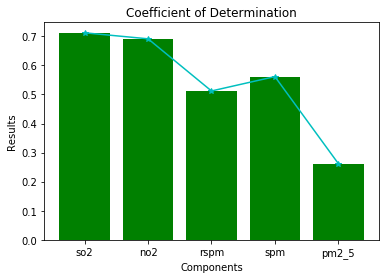

In [0]:
plotter(ht=coef_of_deter,title='Coefficient of Determination')

###Mean Absolute Error

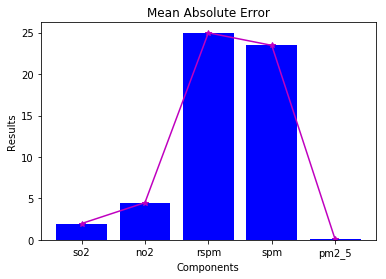

In [0]:
plotter(ht=mabs,title='Mean Absolute Error')

###Mean Squared Error

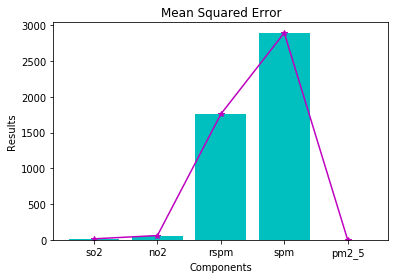

In [0]:
plotter(ht=msqe,title='Mean Squared Error')